In [2]:
import pandas as pd 
import numpy as np
from IPython.display import display 
import matplotlib.pyplot as plt
import seaborn as sns
import functools
import re

In [3]:
fc = pd.read_csv('D:/CODE/KD/datas/KeptGPT/fc_keptGPT.csv')
fc = fc.drop(columns=['Unnamed: 0','Class'])
fc = fc.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', 'p', x))
for parameter in fc:
        fc = fc.astype({'{}'.format(parameter):'str'})#為了下一步，要先將所有資料轉成str
        fc['{}'.format(parameter)] = fc['{}'.format(parameter)].str.extract('(-*\d+\.*\d*)',expand = False)#內部的非數值str都remove
        fc = fc.astype({'{}'.format(parameter):'float'})#移除掉非數值str後將其轉回float
fc


C:\Users\User\AppData\Local\Temp\ipykernel_4108\1681976696.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  fc = pd.read_csv('D:/CODE/KD/datas/KeptGPT/fc_keptGPT.csv')


,ID,p,agepdayp,agepmonthp,agepyearp,WBCp1000p,RBC,Hemoglobin,Hematocrit,MCV,...,Lympcountp,monocytepcountp,eosinophilpcountp,basophilpcountp,Bandpcountp,ALTpGPT,CRP,HBpzpscore,EOSpzpscore,PLTpzpscore
0,5.0,1.0,1.0,0.033333,0.002778,24.6,6.08,21.7,62.5,102.8,...,4920.0,4182.0,615.0,0.0,0.0,13.0,0.80,3.073075,-0.043649,-1.230974
1,27098.0,1.0,1.0,0.033333,0.002778,16.5,6.09,19.8,55.5,91.1,...,2310.0,1402.5,247.5,0.0,82.5,13.0,9.70,2.129271,-0.496995,-0.821823
2,85.0,1.0,1.0,0.033333,0.002778,13.3,3.65,13.7,37.9,103.8,...,4921.0,1596.0,266.0,0.0,0.0,12.0,4.20,-0.900836,-0.270322,-0.716612
3,861121.0,1.0,2.0,0.066667,0.005556,13.1,4.13,13.7,39.1,94.7,...,2751.0,1179.0,262.0,0.0,131.0,14.0,0.10,-0.900836,-0.270322,-1.090694
4,0.0,0.0,2.0,0.066667,0.005556,16.9,5.66,20.6,57.2,101.1,...,3380.0,1859.0,0.0,0.0,0.0,15.0,2.93,2.526662,-1.177013,0.323801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56445,896.0,0.0,6547.0,218.233333,18.186111,10.9,6.13,12.5,40.3,65.7,...,337.9,545.0,400.0,21.8,0.0,17.0,3.80,-0.810496,-0.493174,0.555817
56446,3.0,1.0,6551.0,218.366667,18.197222,3.4,5.06,14.7,42.9,84.8,...,632.4,275.4,0.0,10.2,0.0,20.0,12.67,0.690422,-0.722202,-0.954625
56447,30.0,0.0,6568.0,218.933333,18.244444,9.1,4.82,11.8,36.5,75.7,...,1365.0,1274.0,1000.0,0.0,0.0,10.0,0.10,-1.288060,-0.149633,2.338410
56448,41.0,1.0,6569.0,218.966667,18.247222,6.7,5.24,15.4,44.6,85.1,...,1105.5,911.2,2100.0,20.1,0.0,17.0,4.90,1.167987,0.480193,-1.281207


In [9]:
kd = pd.read_csv('D:/CODE/KD/datas/KeptGPT/kd_keptGPT.csv')
kd = kd.drop(columns=['Unnamed: 0','Class'])
kd = kd.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', 'p', x))
for parameter in kd:
        kd = kd.astype({'{}'.format(parameter):'str'})#為了下一步，要先將所有資料轉成str
        kd['{}'.format(parameter)] = kd['{}'.format(parameter)].str.extract('(-*\d+\.*\d*)',expand = False)#內部的非數值str都remove
        kd = kd.astype({'{}'.format(parameter):'float'})#移除掉非數值str後將其轉回float
with pd.option_context('display.max_rows', 10, 'display.max_columns', None):  # more options can be specified also
    display(kd)  #//for testing 

,ID,p,agepdayp,agepmonthp,agepyearp,WBCp1000p,RBC,Hemoglobin,Hematocrit,MCV,MCH,MCHC,Platelets,Segp,Lymp,monocytep,eosinophilp,basophilp,Bandp,Segpcountp,Lympcountp,monocytepcountp,eosinophilpcountp,basophilpcountp,Bandpcountp,ALTpGPT,CRP,HBpzpscore,EOSpzpscore,PLTpzpscore
0,849.0,1.0,0.0,0.000000,0.000000,12.8,4.80,17.1,51.3,111.5,37.2,33.8,15.0,67.0,20.0,7.0,2.0,0.0,3.0,8576.0,2560.0,896.0,256.0,0.0,384.0,30.0,0.20,0.788076,-0.270322,-3.417011
1,61291.0,1.0,1.0,0.033333,0.002778,19.2,4.11,13.7,40.4,98.3,33.3,33.9,399.0,84.0,6.0,8.0,0.0,1.0,1.0,16128.0,1152.0,1536.0,0.0,192.0,192.0,14.0,8.35,-0.900836,-1.177013,1.071963
2,7.0,1.0,7.0,0.233333,0.019444,4.8,3.74,14.4,43.1,115.2,38.5,33.4,13.0,48.0,18.0,29.0,5.0,0.0,0.0,2304.0,864.0,1392.0,240.0,0.0,0.0,12.0,1.80,-0.553119,1.089714,-3.440391
3,4416.0,0.0,45.0,1.500000,0.125000,16.6,4.09,9.5,30.5,74.6,23.2,31.1,452.0,52.0,35.5,7.5,4.0,0.0,1.0,8632.0,5893.0,1245.0,664.0,0.0,166.0,18.0,88.27,-0.841770,0.269522,0.485262
4,7.0,1.0,46.0,1.533333,0.127778,25.8,2.84,8.0,22.6,79.6,28.2,35.4,412.0,58.5,25.5,7.5,7.5,1.0,4.0,15093.0,6579.0,1935.0,1935.0,258.0,1032.0,8.0,136.30,-2.122224,1.508292,0.127650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1811,2.0,1.0,3703.0,123.433333,10.286111,12.4,4.07,11.4,33.9,83.3,28.0,33.6,452.0,75.0,16.0,3.0,3.0,2.0,0.0,9300.0,1984.0,372.0,372.0,248.0,0.0,89.0,64.83,-1.896380,0.995505,3.005181
1812,82.0,1.0,4215.0,140.500000,11.708333,13.1,3.67,11.5,32.8,89.4,31.3,35.1,266.0,90.0,5.7,3.8,0.4,0.1,0.0,11790.0,746.7,497.8,52.4,13.1,0.0,11.0,88.10,-1.492731,-0.493174,0.474171
1813,3.0,0.0,4218.0,140.600000,11.716667,7.6,4.41,12.6,37.8,85.7,28.6,33.3,533.0,86.3,6.9,1.0,0.0,0.0,1.0,6558.8,524.4,76.0,0.0,0.0,76.0,24.0,9.90,-0.742272,-0.722202,4.107395
1814,8.0,0.0,4274.0,142.466667,11.872222,17.8,3.77,10.4,31.3,83.0,27.6,33.2,305.0,74.0,16.0,4.0,5.0,0.0,1.0,13172.0,2848.0,712.0,890.0,0.0,178.0,11.0,77.63,-2.243190,2.140642,1.004867


### eosinophil count

In [ ]:
fc_eosinophil_count = list(fc['eosinophilpcountp'])
kd_eosinophil_count = list(kd['eosinophilpcountp'])

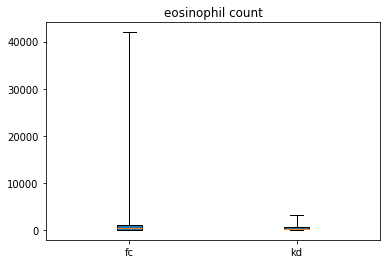

In [6]:
data = [[float(x) for x in fc_eosinophil_count],[float(x) for x in kd_eosinophil_count]]
plt.figure(1)
plt.title('eosinophil count')
plt.boxplot(data,patch_artist = True,showfliers=True,whis = [0,100])
plt.xticks([1, 2], ['fc', 'kd'])
plt.show()

### eosinophil %

In [12]:
fc_eosinophil_percent = list(fc['eosinophilp'])
kd_eosinophil_percent = list(kd['eosinophilp'])

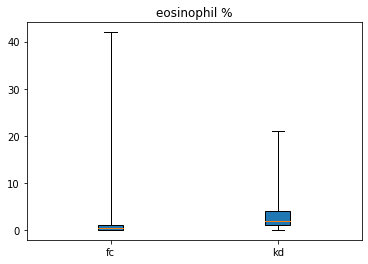

In [13]:
data = [[float(x) for x in fc_eosinophil_percent],[float(x) for x in kd_eosinophil_percent]]
plt.figure(1)
plt.title('eosinophil %')
plt.boxplot(data,patch_artist = True,showfliers=True,whis = [0,100])
plt.xticks([1, 2], ['fc', 'kd'])
plt.show()

### eosinophil z score

In [15]:
fc_eosinophil_zscore = list(fc['EOSpzpscore'])
kd_eosinophil_zscore = list(kd['EOSpzpscore'])

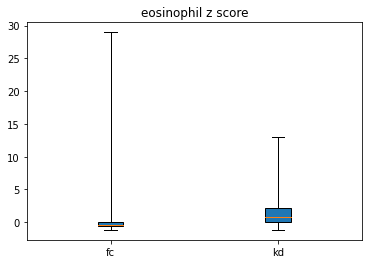

In [16]:
data = [[float(x) for x in fc_eosinophil_zscore],[float(x) for x in kd_eosinophil_zscore]]
plt.figure(1)
plt.title('eosinophil z score')
plt.boxplot(data,patch_artist = True,showfliers=True,whis = [0,100])
plt.xticks([1, 2], ['fc', 'kd'])
plt.show()

### CRP

In [19]:
fc_eosinophil_crp = list(fc['CRP'])
kd_eosinophil_crp = list(kd['CRP'])

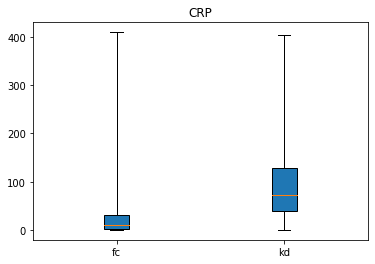

In [20]:
data = [[float(x) for x in fc_eosinophil_crp],[float(x) for x in kd_eosinophil_crp]]
plt.figure(1)
plt.title('CRP')
plt.boxplot(data,patch_artist = True,showfliers=True,whis = [0,100])
plt.xticks([1, 2], ['fc', 'kd'])
plt.show()

### ALT/GPT

In [17]:
fc_eosinophil_ALT = list(fc['ALTpGPT'])
kd_eosinophil_ALT = list(kd['ALTpGPT'])

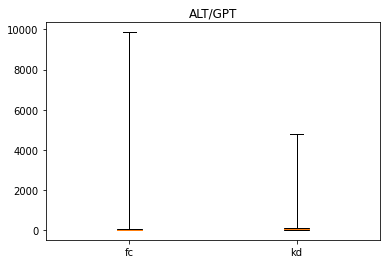

In [18]:
data = [[float(x) for x in fc_eosinophil_ALT],[float(x) for x in kd_eosinophil_ALT]]
plt.figure(1)
plt.title('ALT/GPT')
plt.boxplot(data,patch_artist = True,showfliers=True,whis = [0,100])
plt.xticks([1, 2], ['fc', 'kd'])
plt.show()